# **Recommendation System: Model Sistem Rekomendasi Musik dan Podcast pada Aplikasi Spotify**

Oleh: Noer Hanifah Suganda

---

**A. Project Overview**

Dalam era digital saat ini, sistem rekomendasi telah menjadi komponen penting dalam platform streaming musik seperti Spotify. Dengan jumlah konten yang terus berkembang, pengguna kerap merasa kewalahan dalam mencari musik atau podcast yang sesuai dengan selera dan mood mereka. Proyek ini bertujuan untuk mengembangkan sistem rekomendasi menggunakan pendekatan Content-Based Filtering yang memanfaatkan data demografis dan preferensi mendengarkan, seperti genre favorit, waktu mendengarkan, dan mood yang memengaruhi pilihan musik.

Latar belakang proyek ini didorong oleh beberapa faktor:


*   Pertumbuhan Konten Digital: Dengan banyaknya lagu dan podcast yang tersedia, dibutuhkan sistem yang mampu menyaring dan menyesuaikan rekomendasi dengan kebutuhan individu.

- Personalisasi Mendalam: Pendekatan content-based filtering memungkinkan pembuatan profil pengguna yang akurat berdasarkan atribut lagu, sehingga rekomendasi yang dihasilkan lebih relevan dan personal.

- Landasan Riset Terkini:

  Beberapa studi terkini mendukung pendekatan ini. Misalnya, Chen et al. (2020) mengusulkan metode pembelajaran representasi audio yang memanfaatkan data riwayat mendengarkan untuk menghasilkan audio embedding yang efektif dalam sistem rekomendasi musik berbasis konten.
  
  Selain itu, survei oleh Deldjoo, Schedl, dan Knees (2021) memberikan tinjauan mendalam mengenai evolusi dan tantangan dalam sistem rekomendasi musik yang didorong oleh konten, dengan fokus pada integrasi data sinyal, metadata, dan konten pengguna untuk meningkatkan rekomendasi.


#**B. Business Understanding**

**Problem Statements**

Berdasarkan uraian latar belakang dan karakteristik dataset Spotify yang berisi informasi demografis dan preferensi mendengarkan, rumusan masalah yang akan dijawab dalam proyek ini adalah sebagai berikut:

1.   Bagaimana mengembangkan sistem rekomendasi konten musik dan podcast yang sesuai dengan profil demografis (usia, gender) dan preferensi mendengarkan (genre favorit, waktu mendengarkan, mood) pengguna Spotify
2. Bagaimana mengevaluasi performa model rekomendasi dalam menyajikan konten yang relevan berdasarkan data demografis dan preferensi mendengarkan pengguna Spotify?

**Goals**

Berdasarkan rumusan masalah tersebut, tujuan dari proyek penelitian ini adalah:

1. Mengembangkan sistem rekomendasi konten musik dan podcast yang personal dan relevan:
Mengetahui cara memanfaatkan informasi demografis dan perilaku mendengarkan untuk membangun profil pengguna yang akurat sehingga dapat menyajikan rekomendasi yang sesuai.

2. Mengevaluasi performa model rekomendasi:
Mengukur efektivitas sistem rekomendasi yang dibangun melalui metrik evaluasi yang tepat (misalnya, Precisiondan  Recall), serta melakukan analisis mendalam terhadap hasil yang diperoleh untuk memastikan relevansi dan kepuasan pengguna.

**Solution Statement**

Untuk mengembangkan sistem rekomendasi konten musik dan podcast yang personal dan relevan, saya menggunakan pendekatan Content-Based Filtering dengan evaluasi metrik terukur (seperti Precision dan Recall) sehingga solusi yang dihasilkan dapat dinilai secara objektif.

Pendekatan ini memanfaatkan informasi demografis dan perilaku mendengarkan untuk mengidentifikasi atribut penting seperti genre, tempo, dan energi. Kemudian, sistem mengukur kesamaan antara fitur item dan profil pengguna menggunakan metrik seperti cosine similarity, sehingga menghasilkan rekomendasi yang sesuai dengan preferensi individu.

#**Data Loading**

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

# Memuat data dari file Excel
data = pd.read_excel('Spotify_data.xlsx')

# Menampilkan 5 baris pertama dari dataset
print(data.head())

     Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No         

# **C. Data Understanding**



## EDA - Deskripsi Variabel

In [3]:
data

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


Sumber: https://www.kaggle.com/code/arvindkhoda/spotify-user-behavior-dataset

Dataset ini memiliki 520 baris data dan 20 kolom. Berikut adalah deskripsi masing-masing kolom:

1. Age – Kelompok usia pengguna.

2. Gender – Jenis kelamin pengguna.
3. spotify_usage_period – Lama waktu penggunaan Spotify.

4. spotify_listening_device – Perangkat utama yang digunakan untuk mendengarkan Spotify.

5. spotify_subscription_plan – Jenis paket langganan Spotify yang digunakan.

6. premium_sub_willingness – Kesediaan pengguna untuk berlangganan premium.

7. preffered_premium_plan – Paket premium yang diinginkan pengguna (jika ada).

8. preferred_listening_content – Jenis konten utama yang sering didengarkan (musik/podcast).

9. fav_music_genre – Genre musik favorit pengguna.

10. music_time_slot – Waktu favorit untuk mendengarkan musik.

11. music_Influencial_mood – Mood atau situasi yang memengaruhi pilihan musik.

12. music_lis_frequency – Frekuensi mendengarkan musik.

13. music_expl_method – Cara pengguna menemukan musik baru.

14. music_recc_rating – Penilaian pengguna terhadap rekomendasi musik dari Spotify.

15. pod_lis_frequency – Frekuensi mendengarkan podcast.

16. fav_pod_genre – Genre podcast favorit pengguna.

17. preffered_pod_format – Format podcast yang lebih disukai.

18. pod_host_preference – Preferensi pengguna terhadap host podcast (terkenal atau tidak).

19. preffered_pod_duration – Durasi podcast yang lebih disukai (pendek atau panjang).

20. pod_variety_satisfaction – Tingkat kepuasan terhadap variasi dan ketersediaan podcast di Spotify

Sekarang variabel di tipedata semua kolom kecuali kolom music_recc_rating adalah category

In [4]:
data.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


Hasil data.describe() untuk kolom music_recc_rating menunjukkan statistik deskriptif sebagai berikut:

count (520): Ada 520 entri dalam kolom ini, artinya tidak ada nilai yang hilang (missing values).

mean (3.50): Rata-rata rating yang diberikan pengguna terhadap rekomendasi musik adalah sekitar 3.5 (skala 1-5).

std (0.98): Standard deviasi sebesar 0.98, menunjukkan bahwa rating bervariasi tetapi tidak terlalu jauh dari rata-rata.

min (1): Nilai terendah yang diberikan pengguna adalah 1, artinya ada pengguna yang sangat tidak puas dengan rekomendasi.

25% (3): Seperempat dari data memiliki rating ≤ 3, menunjukkan bahwa sebagian pengguna merasa rekomendasi kurang sesuai.

50% (3.5): Median adalah 3.5, yang berarti separuh pengguna memberikan rating ≤ 3.5, dan separuhnya lagi ≥ 3.5.

75% (4): 75% pengguna memberikan rating ≤ 4, menunjukkan bahwa sebagian besar rating cukup tinggi.

max (5): Nilai tertinggi adalah 5, menunjukkan ada pengguna yang sangat puas dengan rekomendasi.

## Perubahan Tipe Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

Mayoritas data bertipe kategorik dengan hanya satu numerik atribut

In [ ]:
# Convert 'Age' column to categorical
data['Age'] = pd.Categorical(data['Age'], categories=['12-20', '20-35', '35-60'], ordered=True)

# Convert 'Gender' to categorical
data['Gender'] = data['Gender'].astype('category')

# Convert categorical text columns to category type
categorical_columns = [
    'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan',
    'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content',
    'fav_music_genre', 'music_time_slot', 'music_Influencial_mood', 'music_lis_frequency',
    'music_expl_method', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
    'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction'
]

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Display updated data types
data.dtypes


,0
Age,category
Gender,category
spotify_usage_period,category
spotify_listening_device,category
spotify_subscription_plan,category
premium_sub_willingness,category
preffered_premium_plan,category
preferred_listening_content,category
fav_music_genre,category
music_time_slot,category


Berdasarkan isi data, sebagian besar kolom yang saat ini bertipe object memang mengandung nilai kategorikal dengan jumlah kategori yang terbatas, sehingga saya mengubahnya ke tipe data category guna meningkatkan efisiensi memori dan mempermudah analisis.

## Menangani Duplikasi

In [6]:
data.duplicated().sum()

np.int64(1)

Output df.duplicated().sum() menghasilkan nilai 1, yang berarti ada 1 baris dalam DataFrame yang teridentifikasi sebagai duplikat. Maka perlu kita hapus.

In [7]:
df_noduplicates = data.drop_duplicates()

In [8]:
df_noduplicates

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


Dataset sudah berkurang karena duplikatnya telat dihapus

## Menangani Missing Values

In [9]:
df_noduplicates.isnull().sum()

,0
Age,0
Gender,0
spotify_usage_period,0
spotify_listening_device,0
spotify_subscription_plan,0
premium_sub_willingness,0
preffered_premium_plan,207
preferred_listening_content,0
fav_music_genre,0
music_time_slot,0


Age: Terdapat 4 nilai yang hilang.

preffered_premium_plan: Terdapat 207 nilai yang hilang.

fav_pod_genre: Terdapat 147 nilai yang hilang.

preffered_pod_format: Terdapat 139 nilai yang hilang.

pod_host_preference: Terdapat 140 nilai yang hilang.

preffered_pod_duration: Terdapat 128 nilai yang hilang.

Karena terdapat baris yang hilang terlalu banyak, dan tidak semua variabel akan digunakan, maka saya tidak akan menghapus missing values dari variabel preffered_premium_plan yang tidak relevan dalam menjawab goals agar data yang berkurang tidak terlalu banyak. saya

In [10]:
# Tentukan kolom-kolom yang akan dicek missing values (semua kolom kecuali preffered_premium_plan)
cols_to_check = [col for col in df_noduplicates.columns if col != 'preffered_premium_plan']

# Hapus baris yang memiliki missing values pada kolom-kolom tersebut
df_cleaned = df_noduplicates.dropna(subset=cols_to_check)

# Tampilkan jumlah baris sebelum dan sesudah pembersihan
print("Jumlah baris sebelum: ", len(df_noduplicates))
print("Jumlah baris sesudah: ", len(df_cleaned))


Jumlah baris sebelum:  519
Jumlah baris sesudah:  344


Missing values telah dibersihkan

## Membagi Dataset

**Dataset rekomendasi musik**

In [11]:
# Kolom-kolom yang relevan untuk rekomendasi musik
music_columns = [
    'Age','Gender','fav_music_genre', 'music_Influencial_mood', 'music_recc_rating', 'music_lis_frequency'
]
# Membuat dataset untuk rekomendasi musik
df_music1 = df_cleaned[df_cleaned['preferred_listening_content'] == 'Music'][music_columns].copy()


In [12]:
# Menampilkan informasi singkat masing-masing dataset
print("Dataset Rekomendasi Musik:")
print(df_music1.info())

Dataset Rekomendasi Musik:
<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 4 to 518
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     238 non-null    object
 1   Gender                  238 non-null    object
 2   fav_music_genre         238 non-null    object
 3   music_Influencial_mood  238 non-null    object
 4   music_recc_rating       238 non-null    int64 
 5   music_lis_frequency     238 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.0+ KB
None


**Dataset rekomendasi podcast**

In [13]:
# Kolom-kolom yang relevan untuk rekomendasi podcast
podcast_columns = [
    'fav_pod_genre', 'preffered_pod_format', 'pod_variety_satisfaction', 'Age', 'Gender',
]

# Membuat dataset untuk rekomendasi podcast
df_podcast1 = df_cleaned[df_cleaned['preferred_listening_content'] == 'Podcast'][podcast_columns].copy()


In [14]:
print("\nDataset Rekomendasi Podcast:")
print(df_podcast1.info())


Dataset Rekomendasi Podcast:
<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 507
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   fav_pod_genre             106 non-null    object
 1   preffered_pod_format      106 non-null    object
 2   pod_variety_satisfaction  106 non-null    object
 3   Age                       106 non-null    object
 4   Gender                    106 non-null    object
dtypes: object(5)
memory usage: 5.0+ KB
None


Tidak perlu dilakukan penanganan outliers karena tipe data kategorik dan kolom numerik hanya satu, yaitu music_recc_rating yang hanya direntang 1-5 berguna untuk kebutuhan sistem rekomendasi data

## EDA Univariate Analysis dataset df_music

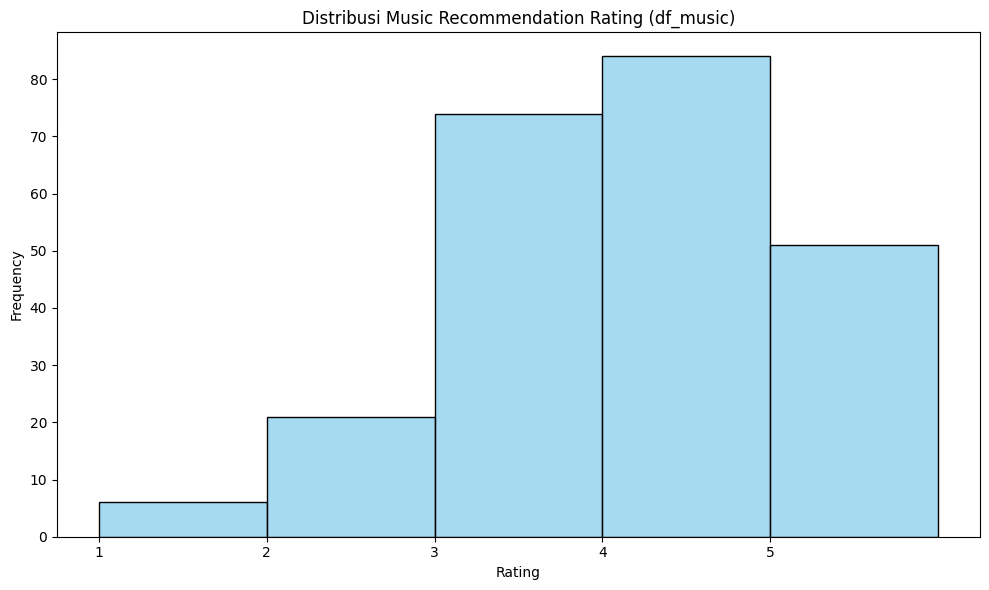

<ipython-input-27-866b103141d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_music, x='fav_music_genre',


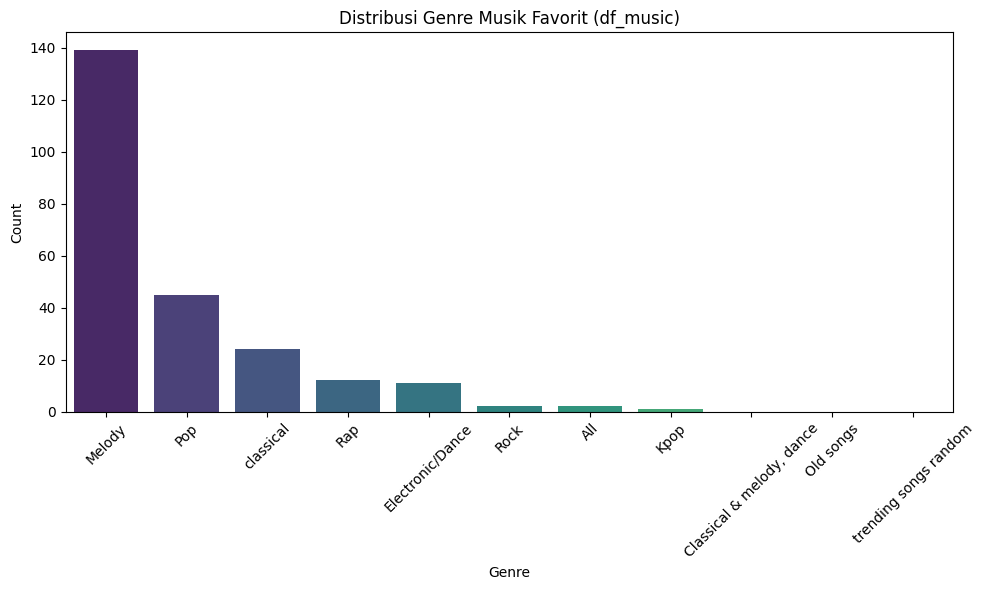

<ipython-input-27-866b103141d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_music, x='Age',


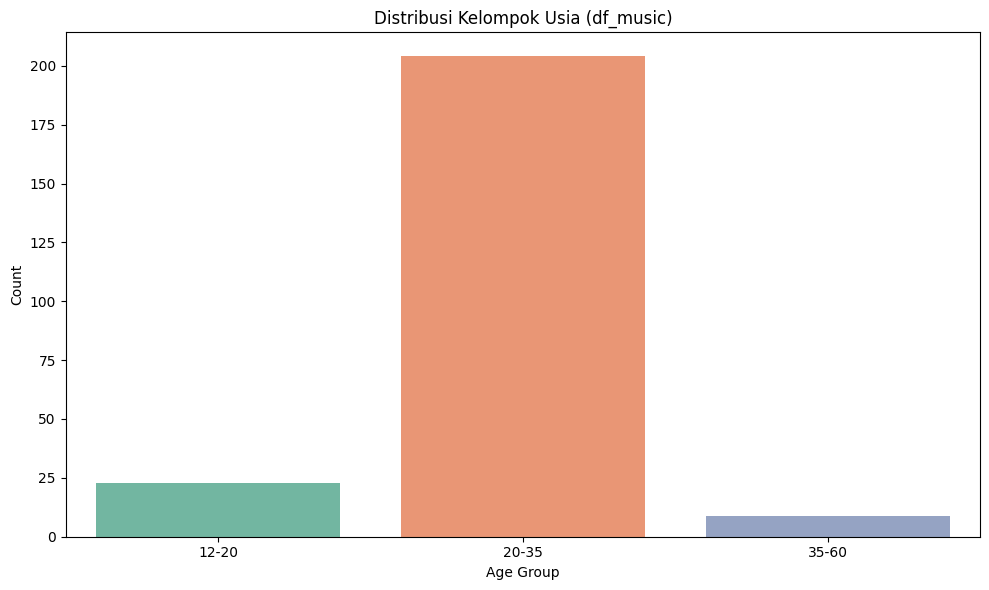

<ipython-input-27-866b103141d7>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_music, x='Gender',


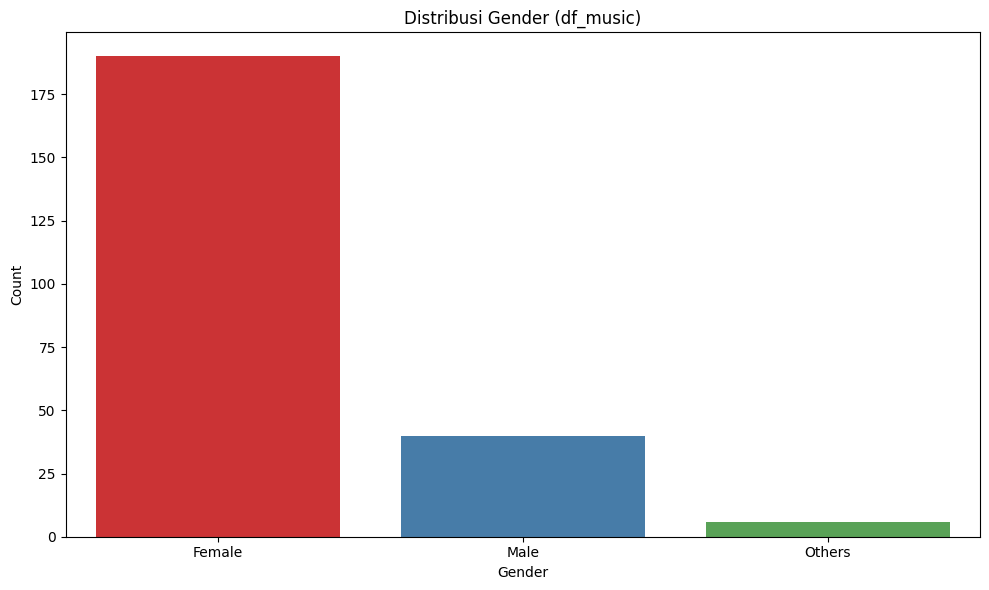

<ipython-input-27-866b103141d7>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_music, x='music_lis_frequency',


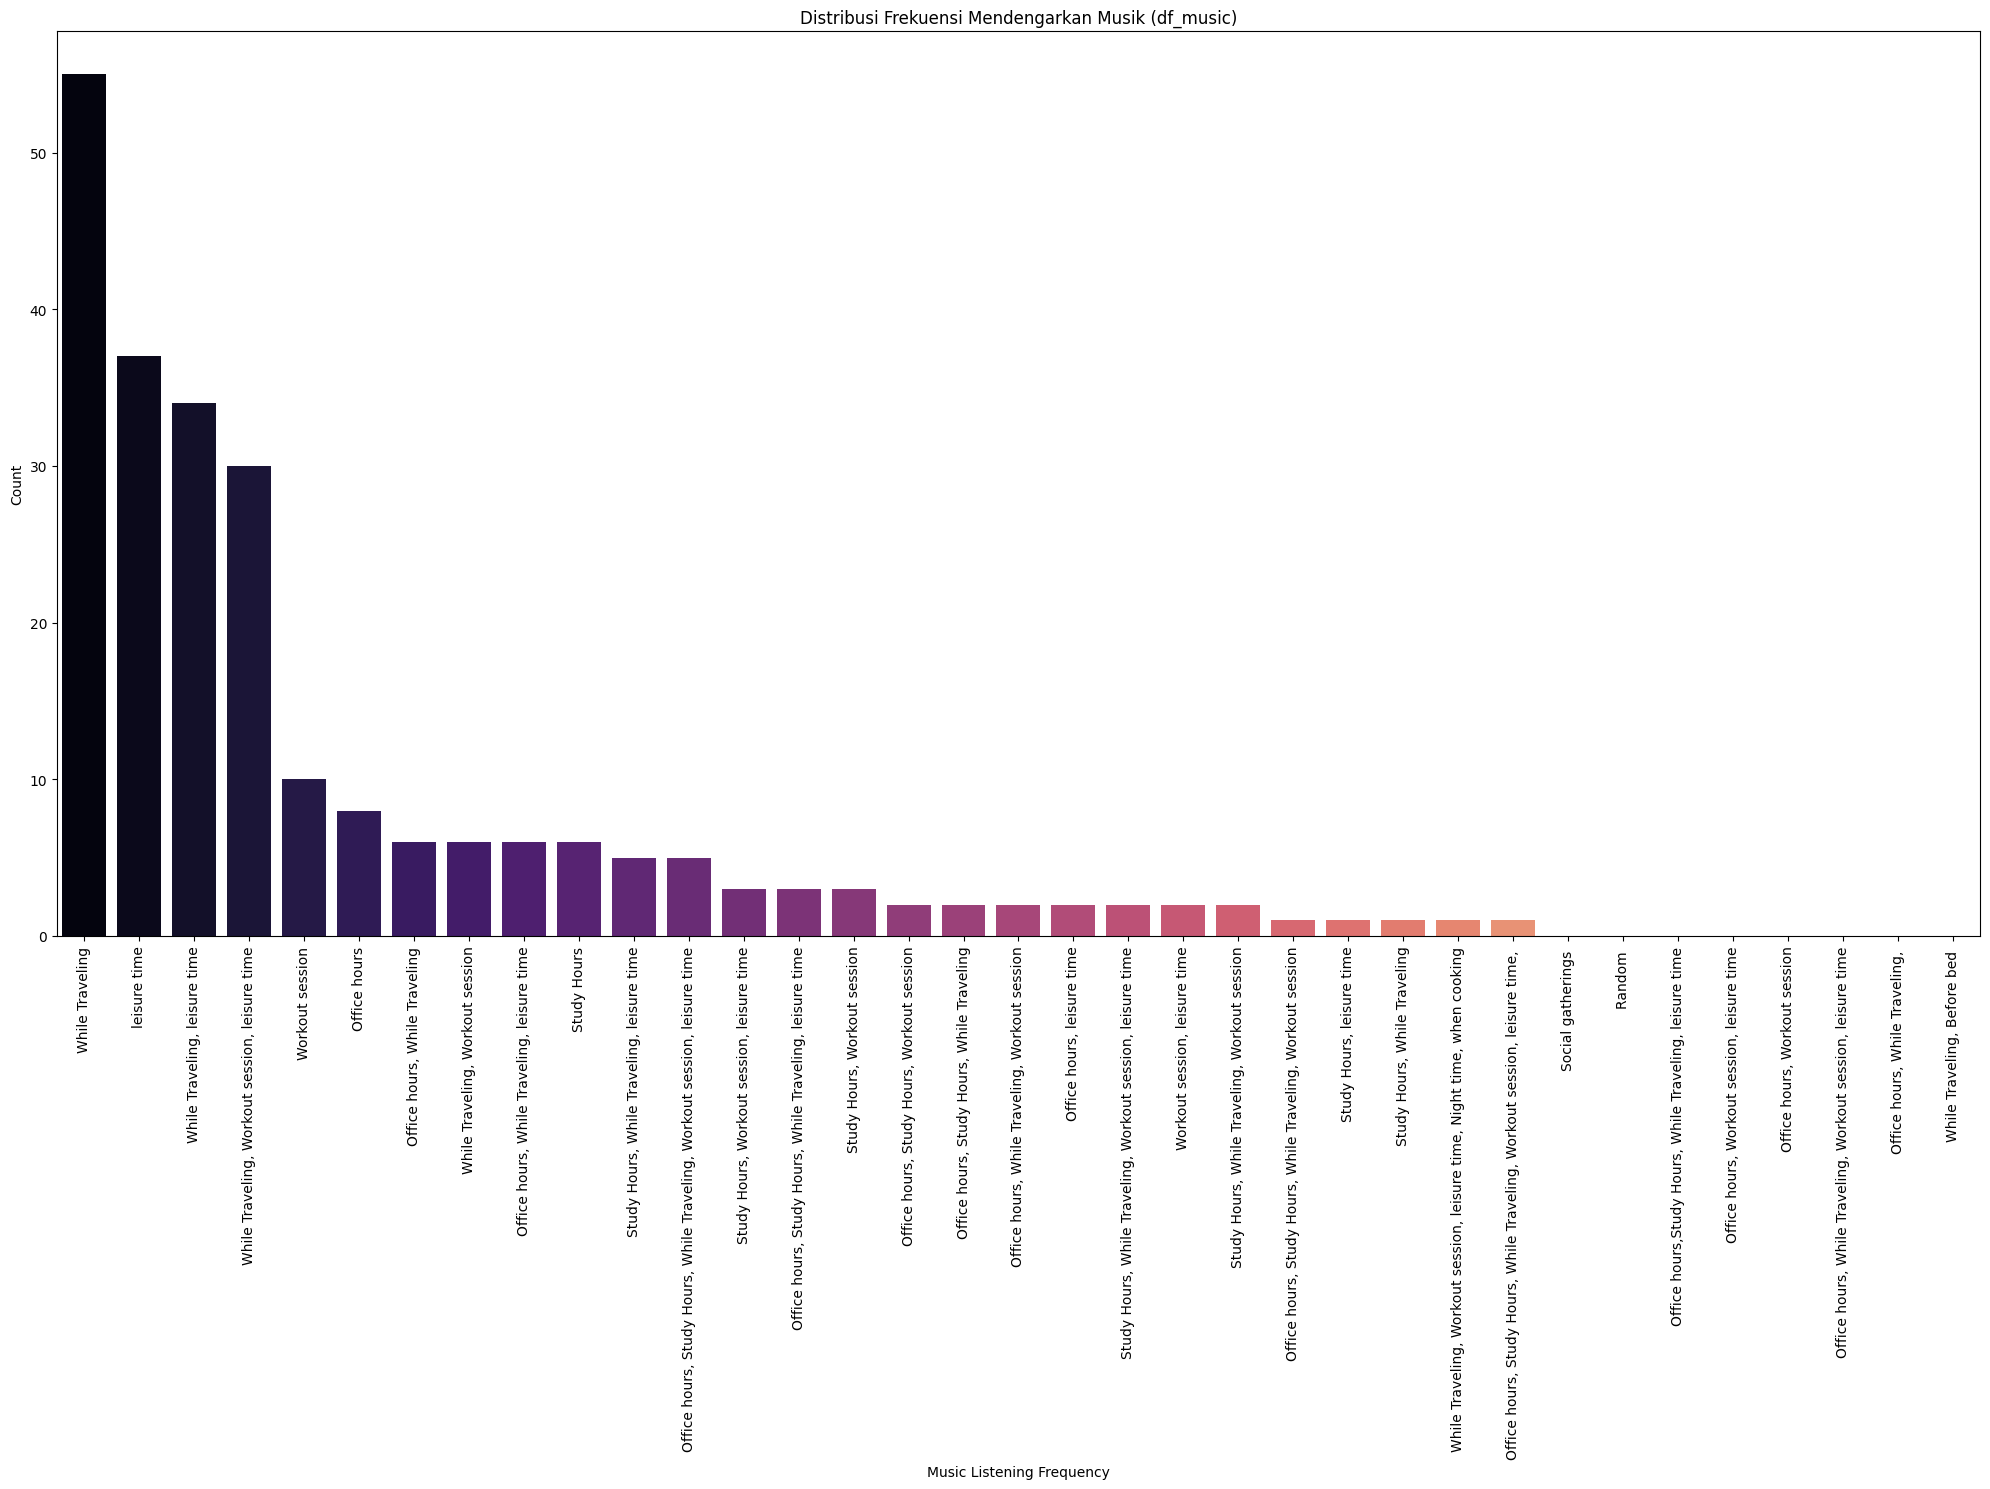

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk music_recc_rating
plt.figure(figsize=(10, 6))
sns.histplot(df_music['music_recc_rating'], bins=range(1, 7), kde=False, color='skyblue')
plt.title('Distribusi Music Recommendation Rating (df_music)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# Bar plot untuk genre musik favorit
plt.figure(figsize=(10, 6))
sns.countplot(data=df_music, x='fav_music_genre',
              order=df_music['fav_music_genre'].value_counts().index,
              palette='viridis')
plt.title('Distribusi Genre Musik Favorit (df_music)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot untuk kelompok usia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_music, x='Age',
              order=['12-20', '20-35', '35-60'], palette='Set2')
plt.title('Distribusi Kelompok Usia (df_music)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar plot untuk gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_music, x='Gender',
              order=df_music['Gender'].value_counts().index, palette='Set1')
plt.title('Distribusi Gender (df_music)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar plot untuk music_lis_frequency
plt.figure(figsize=(20, 15))
sns.countplot(data=df_music, x='music_lis_frequency',
              order=df_music['music_lis_frequency'].value_counts().index,
              palette='magma')
plt.title('Distribusi Frekuensi Mendengarkan Musik (df_music)')
plt.xlabel('Music Listening Frequency')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Insight yang diperoleh:

- Mayoritas pengguna berada pada rentang usia produktif 20–35 tahun (204 orang), menunjukkan dominasi pendengar musik dari kalangan dewasa muda.
- Sebagian besar pengguna adalah perempuan (190 orang), jauh lebih banyak dibanding laki-laki (40) dan lainnya (6).
- Musik paling sering diasosiasikan dengan relaksasi dan pengurang stres (92 orang), diikuti oleh kombinasi relaksasi dan motivasi. Ini menandakan musik dipakai sebagai alat coping dan regulasi emosi.
- Sebagian besar pengguna memberikan rating 3 dan 4 (total 158), yang menunjukkan tingkat kepuasan sedang hingga tinggi terhadap rekomendasi musik.
- Genre paling disukai adalah Melody (139 orang), diikuti Pop dan Classical. Genre seperti Rock dan Kpop kurang populer dalam dataset ini.
- Konteks paling umum untuk mendengarkan musik adalah saat bepergian dan waktu luang, baik secara tunggal maupun kombinasi keduanya.

## EDA Univariate Analysis dataset df_podcast

<ipython-input-21-4da1910a4804>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_podcast1, x='fav_pod_genre',


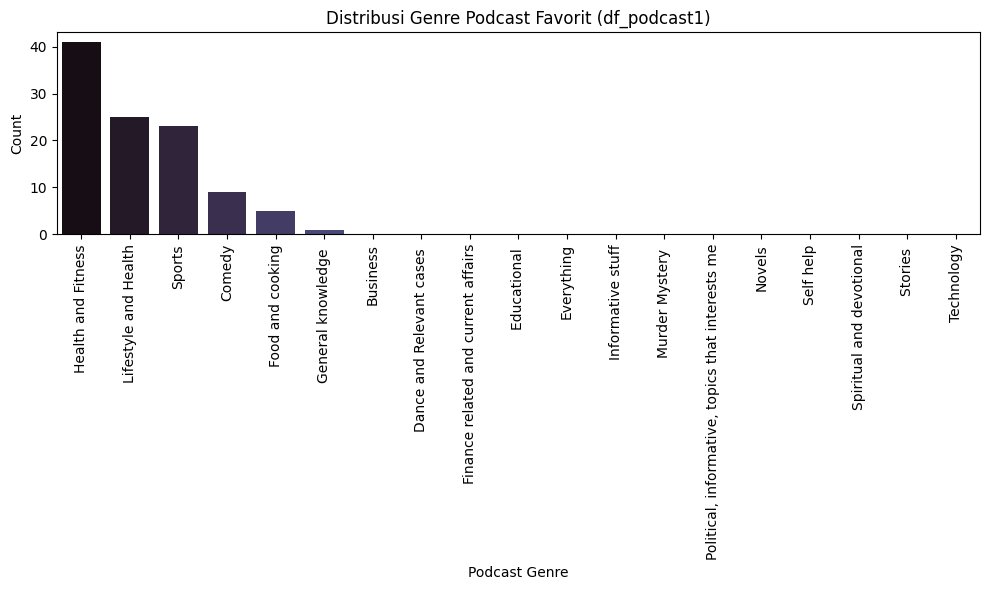

<ipython-input-21-4da1910a4804>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_podcast1, x='preffered_pod_format',


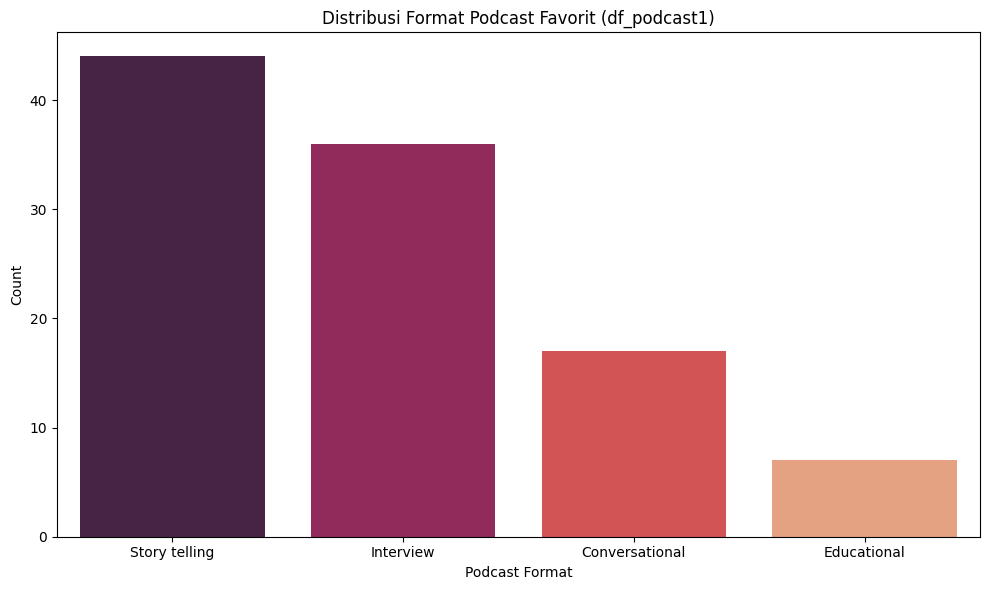

<ipython-input-21-4da1910a4804>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_podcast1, x='pod_variety_satisfaction',


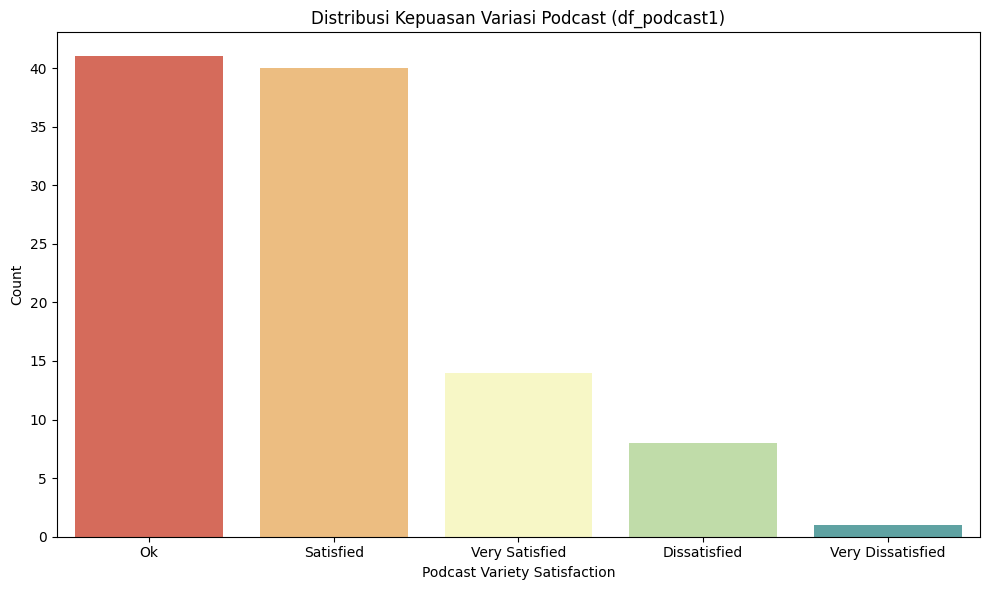

<ipython-input-21-4da1910a4804>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_podcast1, x='Gender',


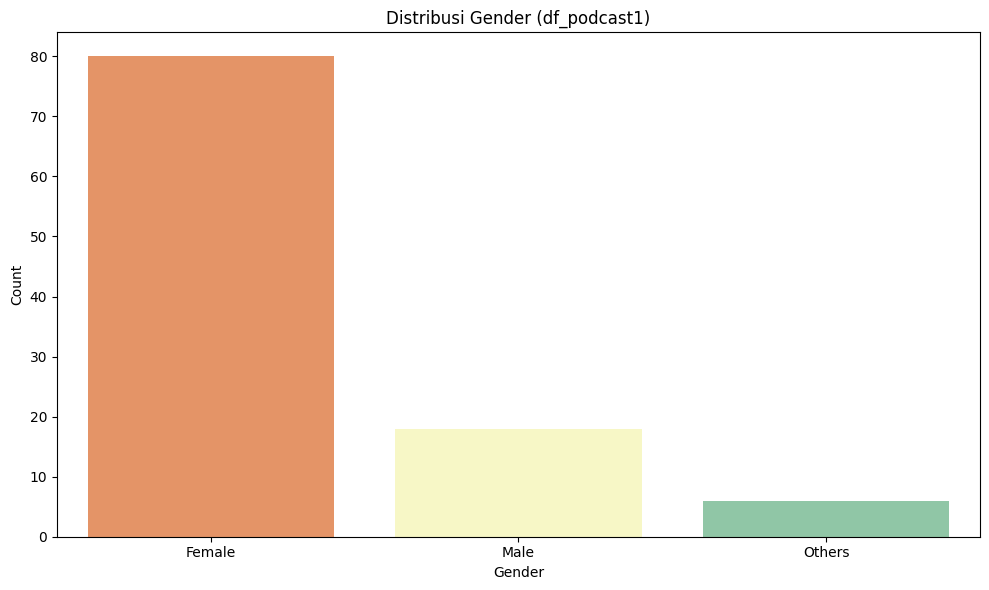

<ipython-input-21-4da1910a4804>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_podcast1, x='Age',


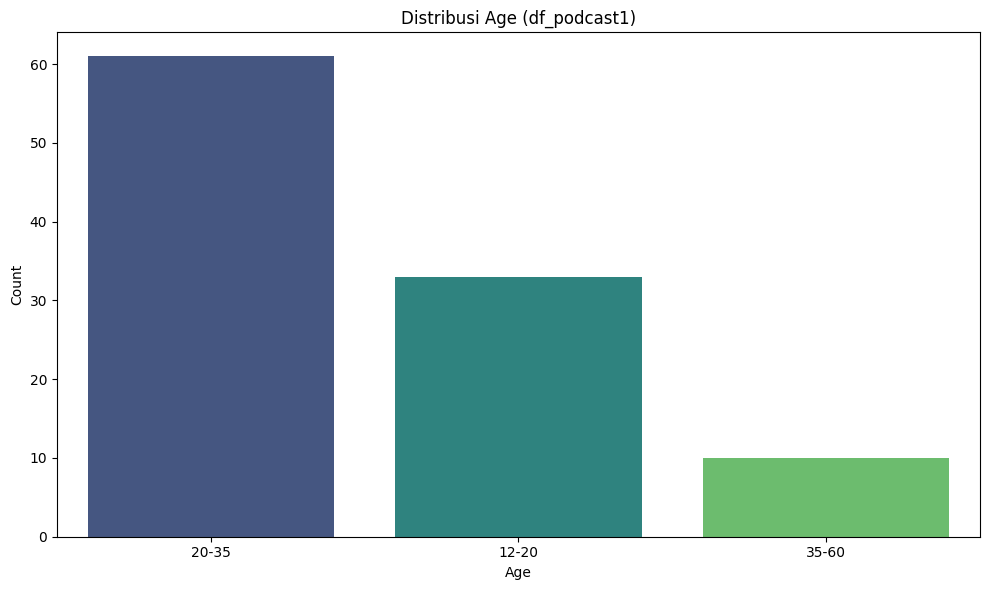

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Distribusi Genre Podcast Favorit
plt.figure(figsize=(10, 6))
sns.countplot(data=df_podcast1, x='fav_pod_genre',
              order=df_podcast1['fav_pod_genre'].value_counts().index,
              palette='mako')
plt.title('Distribusi Genre Podcast Favorit (df_podcast1)')
plt.xlabel('Podcast Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualisasi Distribusi Format Podcast Favorit
plt.figure(figsize=(10, 6))
sns.countplot(data=df_podcast1, x='preffered_pod_format',
              order=df_podcast1['preffered_pod_format'].value_counts().index,
              palette='rocket')
plt.title('Distribusi Format Podcast Favorit (df_podcast1)')
plt.xlabel('Podcast Format')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualisasi Distribusi Kepuasan Variasi Podcast
plt.figure(figsize=(10, 6))
sns.countplot(data=df_podcast1, x='pod_variety_satisfaction',
              order=df_podcast1['pod_variety_satisfaction'].value_counts().index,
              palette='Spectral')
plt.title('Distribusi Kepuasan Variasi Podcast (df_podcast1)')
plt.xlabel('Podcast Variety Satisfaction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualisasi Distribusi Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_podcast1, x='Gender',
              order=df_podcast1['Gender'].value_counts().index,
              palette='Spectral')
plt.title('Distribusi Gender (df_podcast1)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualisasi Distribusi Age
plt.figure(figsize=(10, 6))
sns.countplot(data=df_podcast1, x='Age',
              order=df_podcast1['Age'].value_counts().index,
              palette='viridis')
plt.title('Distribusi Age (df_podcast1)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Insight yang diperoleh:

- Pengguna podcast juga sama seperti pengguna musik berada di mayoritas kelompok usia 20-35 walaupun jumlahnya lebih sedikit hanya 61 pengguna. Hal ini dipengaruhi oleh dataset podcast yang lebih sedikit dibandingkan dengan dataset musik.
- Mayoritas pengguna podcast juga adalah Female (80) dibandingkan dengan Male (18) dan Others (6).
- Genre podcast favorit didominasi oleh Health and Fitness (41), Lifestyle and Health (25), dan Sports (23).
- Format podcast yang disukai adalah Story telling (44) dan Interview (36), yang menunjukkan preferensi terhadap konten naratif dan interaksi dengan narasumber.

## Multivariate EDA df_music

<ipython-input-29-24e3c5f040d0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_music, x="fav_music_genre", y="music_recc_rating", palette="Set3")


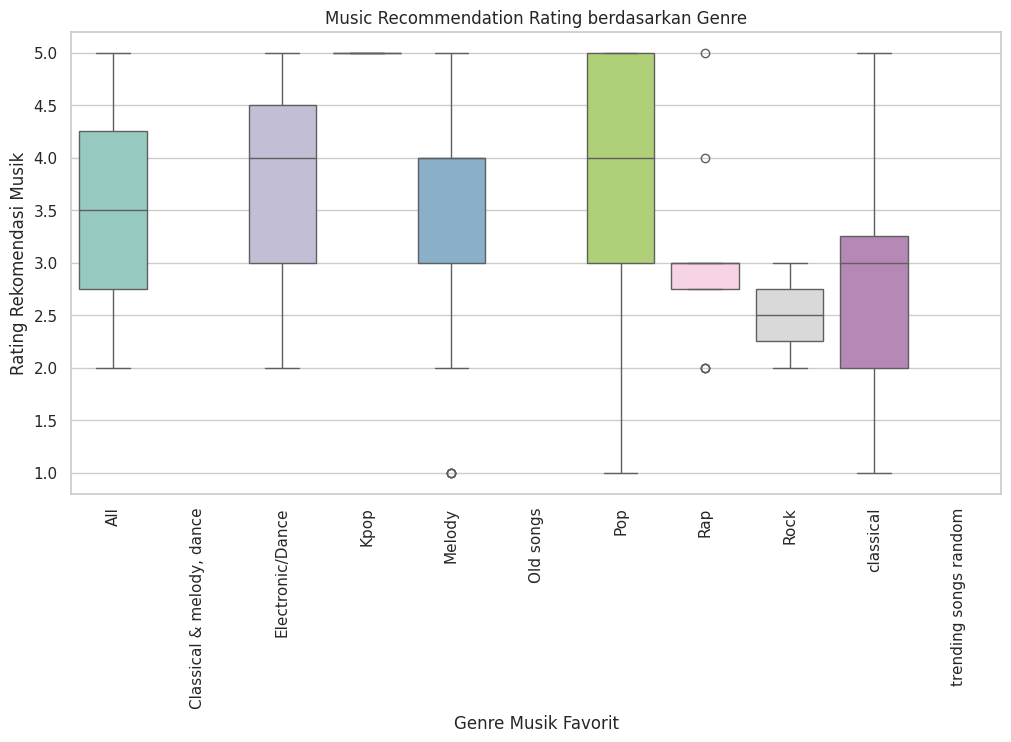

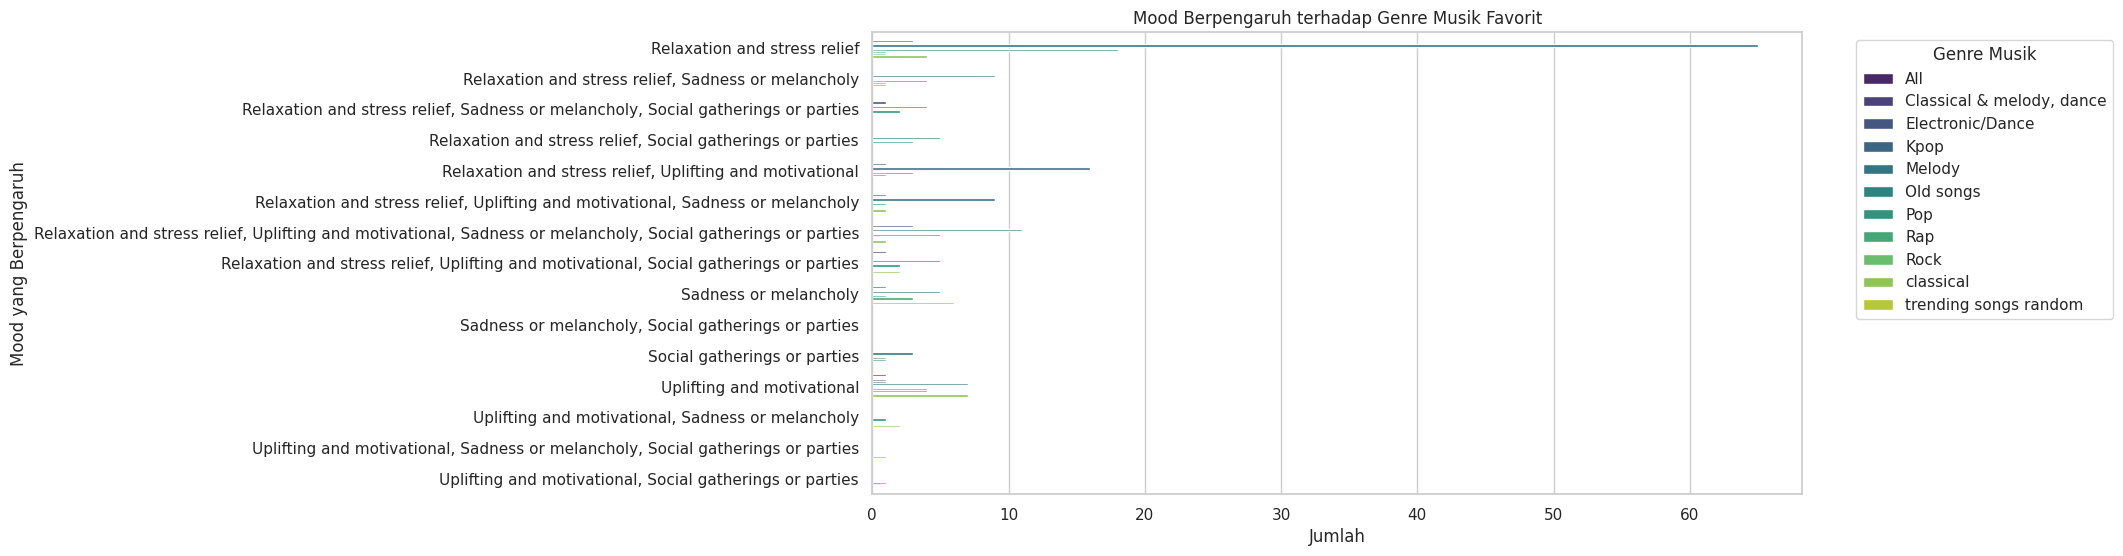

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 2. Boxplot rating musik berdasarkan genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_music, x="fav_music_genre", y="music_recc_rating", palette="Set3")
plt.title("Music Recommendation Rating berdasarkan Genre")
plt.xlabel("Genre Musik Favorit")
plt.ylabel("Rating Rekomendasi Musik")
plt.xticks(rotation=90)
plt.show()

# 3. Countplot dengan hue: mood vs genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df_music, y="music_Influencial_mood", hue="fav_music_genre", palette="viridis")
plt.title("Mood Berpengaruh terhadap Genre Musik Favorit")
plt.xlabel("Jumlah")
plt.ylabel("Mood yang Berpengaruh")
plt.legend(title="Genre Musik", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Buat crosstab antara mood dan genre musik
crosstab = pd.crosstab(df_music['music_Influencial_mood'], df_music['fav_music_genre'])
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara mood dan genre musik.")
else:
    print("Tidak ada hubungan signifikan antara mood dan genre musik.")


Chi-square statistic: 142.76147694959033
p-value: 0.00043244726600508274
Ada hubungan signifikan antara mood dan genre musik.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Uji ANOVA: apakah rata-rata music_recc_rating berbeda antar genre musik?
model = ols('music_recc_rating ~ C(fav_music_genre)', data=df_music).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


                        sum_sq     df         F    PR(>F)
C(fav_music_genre)   35.171515   10.0  3.833421  0.000583
Residual            209.189261  228.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '


p-value = 0.000583 (kurang dari 0.05) menunjukkan bahwa perbedaan rata-rata music_recc_rating antar genre musik (fav_music_genre) adalah signifikan secara statistik.

F-statistic = 3.83 mengindikasikan bahwa variabilitas antara kelompok genre musik lebih besar dibandingkan dengan variabilitas dalam kelompok.

Kesimpulan:
Genre musik memiliki pengaruh signifikan terhadap rating rekomendasi musik. Ini berarti bahwa sistem rekomendasi dapat dikembangkan lebih lanjut dengan mempertimbangkan perbedaan preferensi berdasarkan genre, untuk meningkatkan personalisasi dan relevansi rekomendasi bagi pengguna.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Hubungan antara Age dan fav_music_genre
ct_age_genre = pd.crosstab(df_music['Age'], df_music['fav_music_genre'])
print("Crosstab Age vs fav_music_genre:")
print(ct_age_genre)

chi2_age, p_age, dof_age, expected_age = stats.chi2_contingency(ct_age_genre)
print("\nChi-Square Test for Age vs fav_music_genre:")
print(f"Chi2 Statistic: {chi2_age:.3f}, p-value: {p_age:.3f}, Degrees of Freedom: {dof_age}")

# Hubungan antara Gender dan fav_music_genre
ct_gender_genre = pd.crosstab(df_music['Gender'], df_music['fav_music_genre'])
print("\nCrosstab Gender vs fav_music_genre:")
print(ct_gender_genre)

chi2_gender, p_gender, dof_gender, expected_gender = stats.chi2_contingency(ct_gender_genre)
print("\nChi-Square Test for Gender vs fav_music_genre:")
print(f"Chi2 Statistic: {chi2_gender:.3f}, p-value: {p_gender:.3f}, Degrees of Freedom: {dof_gender}")


Crosstab Age vs fav_music_genre:
fav_music_genre  All  Electronic/Dance  Kpop  Melody  Pop  Rap  Rock  \
Age                                                                    
12-20              0                 0     0       9    6    3     0   
20-35              2                10     1     125   39    8     2   
35-60              0                 1     0       5    0    1     0   

fav_music_genre  classical  
Age                         
12-20                    5  
20-35                   17  
35-60                    2  

Chi-Square Test for Age vs fav_music_genre:
Chi2 Statistic: 15.774, p-value: 0.327, Degrees of Freedom: 14

Crosstab Gender vs fav_music_genre:
fav_music_genre  All  Electronic/Dance  Kpop  Melody  Pop  Rap  Rock  \
Gender                                                                 
Female             1                 8     1     120   35    8     0   
Male               1                 2     0      18   10    2     2   
Others             0        

- Age vs fav_music_genre:
  
  Uji Chi-Square menghasilkan p-value = 0.327 (dengan Chi² = 15.774, df = 14), yang berarti perbedaan distribusi genre musik antara kelompok usia tidak signifikan secara statistik.

  Interpretasi: Preferensi genre musik tampaknya tidak berbeda secara signifikan antar kelompok usia, meskipun kelompok usia 20-35 secara absolut lebih banyak memilih genre tertentu.
- Gender vs fav_music_genre:

  Uji Chi-Square menghasilkan p-value = 0.003 (dengan Chi² = 32.560, df = 14), yang menunjukkan perbedaan distribusi genre signifikan secara statistik antar gender.

  Interpretasi: Preferensi genre musik dipengaruhi oleh gender; misalnya, perempuan dan laki-laki menunjukkan kecenderungan yang berbeda dalam memilih genre musik, yang bisa menjadi informasi penting untuk personalisasi sistem rekomendasi.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Hubungan antara Age dan Gender
ct_age_gender = pd.crosstab(df_music['Age'], df_music['Gender'])
print("Crosstab Age vs Gender:")
print(ct_age_gender)

chi2_age_gender, p_age_gender, dof_age_gender, expected_age_gender = stats.chi2_contingency(ct_age_gender)
print("\nChi-Square Test for Age vs Gender:")
print(f"Chi2 Statistic: {chi2_age_gender:.3f}, p-value: {p_age_gender:.3f}, Degrees of Freedom: {dof_age_gender}")

# Hubungan antara Age dan music_Influencial_mood
ct_age_mood = pd.crosstab(df_music['Age'], df_music['music_Influencial_mood'])
print("\nCrosstab Age vs music_Influencial_mood:")
print(ct_age_mood)

chi2_age_mood, p_age_mood, dof_age_mood, expected_age_mood = stats.chi2_contingency(ct_age_mood)
print("\nChi-Square Test for Age vs music_Influencial_mood:")
print(f"Chi2 Statistic: {chi2_age_mood:.3f}, p-value: {p_age_mood:.3f}, Degrees of Freedom: {dof_age_mood}")


Crosstab Age vs Gender:
Gender  Female  Male  Others
Age                         
12-20       16     5       2
20-35      168    33       3
35-60        6     2       1

Chi-Square Test for Age vs Gender:
Chi2 Statistic: 8.120, p-value: 0.087, Degrees of Freedom: 4

Crosstab Age vs music_Influencial_mood:
music_Influencial_mood  Relaxation and stress relief  \
Age                                                    
12-20                                              9   
20-35                                             80   
35-60                                              3   

music_Influencial_mood  Relaxation and stress relief, Sadness or melancholy  \
Age                                                                           
12-20                                                                   0     
20-35                                                                  15     
35-60                                                                   0     

music_Influencia

- Age vs music_Influencial_mood

  Chi2 Statistic: 39.603
  p-value: 0.043
  Karena p-value < 0.05, maka terdapat hubungan yang signifikan antara kelompok usia dan pengaruh mood terhadap preferensi musik.
Artinya, kategori usia seseorang cenderung memengaruhi alasan emosional mereka dalam mendengarkan musik

- Age vs Gender
  
  Chi2 Statistic: 8.120
  p-value: 0.087
  Karena p-value > 0.05, maka tidak ada hubungan yang signifikan antara kelompok usia dan gender pada data ini.
Artinya, distribusi gender di setiap kelompok usia tidak berbeda secara signifikan

##  Multivariate EDA df_podcast

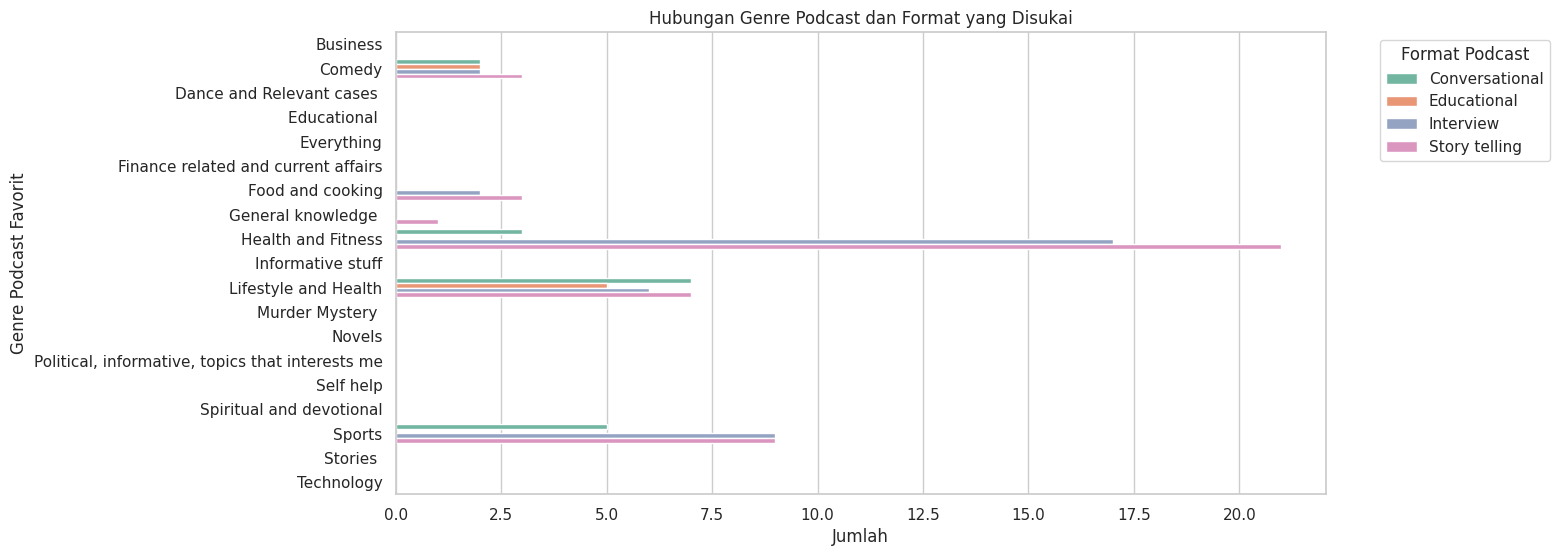

<ipython-input-23-dcf59cd2a1de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_podcast, x="preffered_pod_duration", y="pod_lis_frequency", palette="Pastel1")


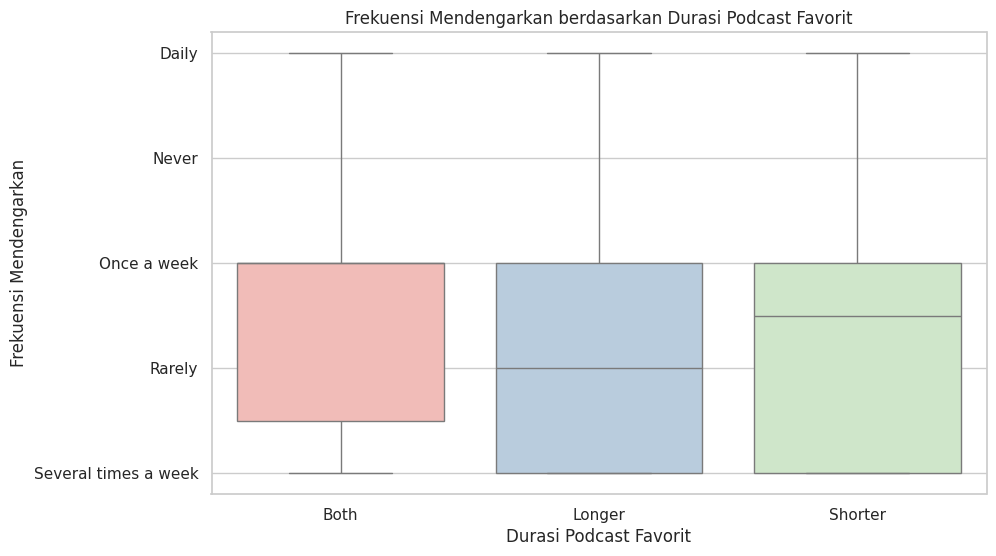

Crosstab Hubungan Host dan Format Podcast:
 preffered_pod_format    Conversational  Educational  Interview  Story telling
pod_host_preference                                                          
Both                                 7            3         10             17
Well known individuals               4            3          8              4
unknown Podcasters                   6            1         18             23


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Distribusi genre podcast vs format podcast
plt.figure(figsize=(12, 6))
sns.countplot(data=df_podcast, y="fav_pod_genre", hue="preffered_pod_format", palette="Set2")
plt.title("Hubungan Genre Podcast dan Format yang Disukai")
plt.xlabel("Jumlah")
plt.ylabel("Genre Podcast Favorit")
plt.legend(title="Format Podcast", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Preferensi durasi podcast vs frekuensi mendengarkan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_podcast, x="preffered_pod_duration", y="pod_lis_frequency", palette="Pastel1")
plt.title("Frekuensi Mendengarkan berdasarkan Durasi Podcast Favorit")
plt.xlabel("Durasi Podcast Favorit")
plt.ylabel("Frekuensi Mendengarkan")
plt.show()

# 3. Crosstab antara host podcast dan format favorit
import pandas as pd
crosstab_pod = pd.crosstab(df_podcast["pod_host_preference"], df_podcast["preffered_pod_format"])
print("Crosstab Hubungan Host dan Format Podcast:\n", crosstab_pod)


In [ ]:
from scipy.stats import chi2_contingency

# Buat crosstab dulu
crosstab = pd.crosstab(df_podcast["fav_pod_genre"], df_podcast["preffered_pod_format"])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Ada hubungan yang signifikan antara Genre dan Format Podcast.")
else:
    print("❌ Tidak ditemukan hubungan signifikan.")


Chi-square statistic: 25.81665230286194
p-value: 0.039994571314622494
✅ Ada hubungan yang signifikan antara Genre dan Format Podcast.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('pod_lis_frequency_num ~ C(preffered_pod_duration_num)', data=df_podcast).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


                                   sum_sq     df         F    PR(>F)
C(preffered_pod_duration_num)    4.105366    2.0  1.765439  0.176351
Residual                       117.433095  101.0       NaN       NaN


Dari hasil ANOVA, nilai p-value (PR(>F)) = 0.176351 menunjukkan bahwa tidak ada hubungan yang signifikan antara preferred podcast duration dan listening frequency pada tingkat signifikansi 0.05 (atau 5%).

📌 Interpretasi:
F-statistic = 1.765 menunjukkan bahwa variabilitas rata-rata antar kelompok tidak jauh berbeda dibandingkan variabilitas dalam kelompok.

p-value > 0.05 → Tidak cukup bukti untuk menyatakan bahwa preferensi durasi podcast berpengaruh terhadap frekuensi mendengarkan secara signifikan.

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Pastikan fav_pod_genre sudah dalam bentuk kategori numerik
df_podcast['fav_pod_genre_num'] = df_podcast['fav_pod_genre'].astype('category').cat.codes

# Uji ANOVA untuk hubungan genre podcast dengan frekuensi mendengarkan
model_genre = ols('pod_lis_frequency_num ~ C(fav_pod_genre_num)', data=df_podcast).fit()
anova_result_genre = sm.stats.anova_lm(model_genre, typ=2)
print(anova_result_genre)

# Jika data tidak terdistribusi normal, gunakan Kruskal-Wallis
h_stat, p_value = stats.kruskal(*[df_podcast[df_podcast['fav_pod_genre_num'] == g]['pod_lis_frequency_num'] for g in df_podcast['fav_pod_genre_num'].unique()])
print(f"Kruskal-Wallis Test: H-statistic = {h_stat}, p-value = {p_value}")


                          sum_sq    df         F    PR(>F)
C(fav_pod_genre_num)    6.498367   5.0  1.107162  0.361614
Residual              115.040094  98.0       NaN       NaN
Kruskal-Wallis Test: H-statistic = 4.321047543013302, p-value = 0.5041774243774751


Hasil uji ANOVA dan Kruskal-Wallis menunjukkan bahwa tidak ada pengaruh signifikan antara genre podcast favorit terhadap frekuensi mendengarkan podcast.

🔹 Interpretasi

ANOVA (p = 0.3616): Tidak ada perbedaan yang signifikan dalam frekuensi mendengarkan berdasarkan genre podcast favorit.

Kruskal-Wallis (p = 0.5042): Hasil serupa, menunjukkan tidak ada perbedaan distribusi yang mencolok.

# D. Data Preparation

In [15]:
# Kolom-kolom yang relevan untuk rekomendasi musik
music_columns = [
    'Age','Gender','fav_music_genre', 'music_Influencial_mood', 'music_recc_rating'
]
# Membuat dataset untuk rekomendasi musik
df_music = df_cleaned[df_cleaned['preferred_listening_content'] == 'Music'][music_columns].copy()


In [17]:
# Kolom-kolom yang relevan untuk rekomendasi podcast
podcast_columns = [
    'fav_pod_genre', 'preffered_pod_format', 'pod_variety_satisfaction'
]

# Membuat dataset untuk rekomendasi podcast
df_podcast = df_cleaned[df_cleaned['preferred_listening_content'] == 'Podcast'][podcast_columns].copy()


## **Musik TF-DF**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_music_prepared = df_music.copy()
df_podcast_prepared = df_podcast.copy()

# 🔹 1. Tentukan kolom kategorikal yang akan digabung
music_categorical_cols = ['Age', 'Gender', 'fav_music_genre', 'music_Influencial_mood']

# 🔹 2. Gabungkan nilai kolom menjadi satu string per baris
df_music['music_feature_text'] = df_music[music_categorical_cols].astype(str).agg(' '.join, axis=1)

## Musik Jaccard

In [19]:
import pandas as pd

# 🔹 Salin data agar tidak merusak aslinya
df_music_jaccard = df_music.copy()

# 🔹 Pilih kolom-kolom kategorikal untuk fitur Jaccard
music_jaccard_cols = ['Age', 'Gender', 'fav_music_genre', 'music_Influencial_mood']

# 🔹 One-Hot Encoding (mengubah jadi format biner)
df_music_jaccard_encoded = pd.get_dummies(df_music_jaccard[music_jaccard_cols])



## Podcast TD-DF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Kolom yang digunakan
podcast_tfidf_cols = ['fav_pod_genre', 'preffered_pod_format'
                      ]

# Encode setiap kolom kategorikal agar bisa digabung sebagai text
df_podcast_tfidf = df_podcast.copy()
for col in podcast_tfidf_cols:
    df_podcast_tfidf[col] = LabelEncoder().fit_transform(df_podcast_tfidf[col].astype(str))

# Gabungkan semua kolom menjadi satu string per baris (dokumen)
df_podcast_tfidf['tfidf_features'] = df_podcast_tfidf[podcast_tfidf_cols].astype(str).agg(' '.join, axis=1)


In [23]:
# Mapping kepuasan ke skor numerik
satisfaction_map = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Ok': 3,  # ✅ perbaikan di sini
    'Satisfied': 4,
    'Very Satisfied': 5
}


df_podcast_tfidf['satisfaction_score'] = df_podcast_tfidf['pod_variety_satisfaction'].map(satisfaction_map)


In [24]:
# Bersihkan nilai kolom agar cocok dengan mapping
df_podcast_tfidf['pod_variety_satisfaction'] = df_podcast_tfidf['pod_variety_satisfaction'].str.strip().str.title()

# Terapkan mapping setelah dibersihkan
df_podcast_tfidf['satisfaction_score'] = df_podcast_tfidf['pod_variety_satisfaction'].map(satisfaction_map)


In [ ]:
df_podcast_prepared['podcast_feature_vector'] = df_podcast_prepared[podcast_categorical_cols].astype(str).agg(' '.join, axis=1)


## Podcast Jaccard

In [25]:
from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal yang digunakan untuk kesamaan
podcast_jaccard_cols = ['fav_pod_genre', 'preffered_pod_format']

# Salin dataframe untuk persiapan
df_podcast_jaccard = df_podcast.copy()

# Encode tiap kolom dengan LabelEncoder
for col in podcast_jaccard_cols:
    le = LabelEncoder()
    df_podcast_jaccard[col] = le.fit_transform(df_podcast_jaccard[col].astype(str))

# Gabungkan jadi representasi biner per baris
df_podcast_jaccard['encoded_features'] = df_podcast_jaccard[podcast_jaccard_cols].values.tolist()


In [26]:
df_podcast_jaccard = df_podcast_tfidf[podcast_jaccard_cols].copy()
df_podcast_jaccard = df_podcast_jaccard.apply(LabelEncoder().fit_transform)
df_podcast_jaccard['encoded_features'] = df_podcast_jaccard.values.tolist()
df_podcast_jaccard.reset_index(drop=True, inplace=True)  # ✅ Penting


# **E. Modelling**

## Musik TF-IDF

In [27]:
# 🔹 3. Vektorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer()
music_tfidf_matrix = tfidf.fit_transform(df_music['music_feature_text'])

# 🔹 4. Hitung matriks cosine similarity antar baris data
music_cosine_sim = cosine_similarity(music_tfidf_matrix, music_tfidf_matrix)

# 🔹 5. Fungsi untuk menghasilkan rekomendasi berdasarkan cosine similarity
def get_music_recommendations(idx, top_n=5):
    """
    Mengembalikan indeks baris rekomendasi untuk data musik berdasarkan TF-IDF dan cosine similarity.
    :param idx: indeks baris dari data musik yang menjadi acuan
    :param top_n: jumlah rekomendasi teratas yang diinginkan (default=5)
    :return: list indeks baris rekomendasi
    """
    # Ambil skor similarity untuk baris idx
    sim_scores = list(enumerate(music_cosine_sim[idx]))
    # Urutkan berdasarkan skor similarity secara menurun
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Lewati item itu sendiri (indeks pertama)
    sim_scores = sim_scores[1:top_n+1]
    # Ambil indeks rekomendasi
    recommended_indices = [i[0] for i in sim_scores]
    return recommended_indices

# Contoh penggunaan: Dapatkan 5 rekomendasi untuk baris pertama
recommendations_for_first = get_music_recommendations(0, top_n=5)
print("Rekomendasi untuk data musik indeks 0:", recommendations_for_first)


Rekomendasi untuk data musik indeks 0: [5, 8, 9, 12, 29]



🔍 Interpretasi Hasil:
🔸 Rata-rata selisih rating rekomendasi: +0.041

Artinya, rata-rata rating item yang direkomendasikan sedikit lebih tinggi dibanding item acuan.

Meski selisihnya kecil, ini tetap positif — sistem kamu tidak "menurunkan kualitas".

🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 68.56%

Ini berarti dalam 5 rekomendasi teratas, sekitar 3 sampai 4 rekomendasi punya rating sama atau lebih baik dari item acuan.

Proporsi ini cukup bagus dan menunjukkan sistem kamu memberi rekomendasi yang relevan secara umum.

## Musik Jaccard

In [28]:
from scipy.spatial.distance import pdist, squareform

# 🔹 Hitung Jaccard Distance antar semua baris
jaccard_dist_music = pdist(df_music_jaccard_encoded.values, metric='jaccard')

# 🔹 Ubah ke matriks jarak
jaccard_dist_matrix_music = squareform(jaccard_dist_music)

# 🔹 Ubah ke Jaccard Similarity (1 - distance)
jaccard_sim_matrix_music = 1 - jaccard_dist_matrix_music


In [29]:
def get_music_recommendations_jaccard(index, top_n=5):
    # Urutkan skor kemiripan dari yang paling tinggi
    sim_scores = list(enumerate(jaccard_sim_matrix_music[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil indeks top_n rekomendasi (lewatkan dirinya sendiri)
    sim_scores = sim_scores[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]

    return recommended_indices


## Podcast TF-DF

In [30]:
# 🔹 TF-IDF Vectorizer
tfidf_vectorizer_podcast = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
tfidf_matrix_podcast = tfidf_vectorizer_podcast.fit_transform(df_podcast_tfidf['tfidf_features'])

# 🔹 Hitung cosine similarity antar semua baris
cosine_sim_podcast = cosine_similarity(tfidf_matrix_podcast, tfidf_matrix_podcast)

# 🔹 Fungsi rekomendasi untuk podcast
def get_podcast_recommendations(idx, top_n=5):
    """
    Mengembalikan indeks baris rekomendasi untuk podcast berdasarkan TF-IDF dan cosine similarity.
    :param idx: indeks baris dari data podcast yang menjadi acuan
    :param top_n: jumlah rekomendasi teratas yang diinginkan
    :return: list indeks baris rekomendasi
    """
    sim_scores = list(enumerate(cosine_sim_podcast[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Lewati item itu sendiri
    recommended_indices = [i[0] for i in sim_scores]
    return recommended_indices

# ✅ Contoh: Rekomendasi untuk baris pertama
df_podcast_tfidf = df_podcast_tfidf.reset_index(drop=True)
podcast_recs_for_0 = get_podcast_recommendations(0, top_n=5)
print("Rekomendasi podcast untuk indeks 0:", podcast_recs_for_0)


Rekomendasi podcast untuk indeks 0: [92, 2, 12, 17, 40]


## Podcast Jaccard

In [31]:
#hitung Jaccard Similarity antar baris berdasarkan fitur yang telah diencode.
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0


In [32]:
# Hitung matriks jaccard similarity antar semua baris podcast
n = len(df_podcast_jaccard)
podcast_jaccard_sim = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        podcast_jaccard_sim[i][j] = jaccard_similarity(
            df_podcast_jaccard.loc[i, 'encoded_features'],
            df_podcast_jaccard.loc[j, 'encoded_features']
        )


## Hybrid Method untuk Musik

In [70]:
import numpy as np

# 🔸 Langkah 1: Gabungkan cosine similarity (TF-IDF) dan jaccard similarity
hybrid_sim_music = 0.5 * music_cosine_sim + 0.5 * jaccard_sim_matrix_music

# 🔸 Langkah 2: Fungsi evaluasi
def evaluate_recommendation_quality(sim_matrix, ratings, top_n=5):
    score_diffs = []
    count_better_or_equal = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        base_rating = ratings[idx]
        rec_ratings = [ratings[i] for i in recommended_indices]

        avg_rec_rating = np.mean(rec_ratings)
        score_diffs.append(avg_rec_rating - base_rating)

        better_or_equal = sum([1 for r in rec_ratings if r >= base_rating])
        count_better_or_equal.append(better_or_equal / top_n)

    return {
        'avg_rating_diff': np.mean(score_diffs),
        'avg_percent_recommendations_better_or_equal': np.mean(count_better_or_equal)
    }


## Hybrid Method untuk Podcast

In [74]:
from sklearn.preprocessing import MinMaxScaler

# 🔹 Normalisasi cosine similarity podcast
scaler = MinMaxScaler()
cosine_sim_podcast_norm = scaler.fit_transform(cosine_sim_podcast)

# 🔹 Normalisasi jaccard similarity podcast
jaccard_sim_matrix_podcast_norm = scaler.fit_transform(podcast_jaccard_sim)

# 🔹 Gabungkan jadi hybrid similarity (rata-rata)
hybrid_sim_podcast = (cosine_sim_podcast_norm + jaccard_sim_matrix_podcast_norm) / 2

# 🔹 Fungsi untuk rekomendasi hybrid
def get_podcast_recommendations_hybrid(index, top_n=5):
    sim_scores = list(enumerate(hybrid_sim_podcast[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]
    return recommended_indices


# **F. Evaluation**

## **Musik TF-DF**

In [33]:
import numpy as np

# 🔹 Ambil rating asli
music_ratings = df_music['music_recc_rating'].values

# 🔹 Fungsi evaluasi
def evaluate_recommendation_quality(sim_matrix, ratings, top_n=5):
    score_diffs = []
    count_better_or_equal = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        base_rating = ratings[idx]
        rec_ratings = [ratings[i] for i in recommended_indices]

        # Simpan rata-rata perbedaan rating
        avg_rec_rating = np.mean(rec_ratings)
        score_diffs.append(avg_rec_rating - base_rating)

        # Hitung berapa rekomendasi yang ratingnya >= rating item acuan
        better_or_equal = sum([1 for r in rec_ratings if r >= base_rating])
        count_better_or_equal.append(better_or_equal / top_n)

    return {
        'avg_rating_diff': np.mean(score_diffs),
        'avg_percent_recommendations_better_or_equal': np.mean(count_better_or_equal)
    }

# 🔹 Evaluasi model
eval_result = evaluate_recommendation_quality(music_cosine_sim, music_ratings, top_n=5)

# 🔹 Tampilkan hasil
print("📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Musik):")
print(f"🔸 Rata-rata selisih rating rekomendasi: {eval_result['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: {eval_result['avg_percent_recommendations_better_or_equal']:.2%}")


📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Musik):
🔸 Rata-rata selisih rating rekomendasi: -0.160
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 62.10%


✅ Langkah Evaluasi Rekomendasi Spesifik dari item yang direkomendasikan lebih baik/sama dari item referensi (indeks 0):

In [34]:
# Reset index agar dimulai dari 0, 1, 2, ...
df_music = df_music.reset_index(drop=True)


In [35]:
# Ambil rating dari user acuan (indeks 0)
base_rating = df_music.loc[0, 'music_recc_rating']

# Ambil indeks rekomendasi
recommendation_indices = get_music_recommendations(0, top_n=5)

# Ambil rating dari item yang direkomendasikan
recommended_ratings = df_music.loc[recommendation_indices, 'music_recc_rating'].values

# Evaluasi
rating_diff = recommended_ratings - base_rating
better_or_same = (recommended_ratings >= base_rating).mean() * 100

print("📊 Evaluasi Rekomendasi untuk Index 0")
print(f"Rating awal: {base_rating}")
print(f"Rating rekomendasi: {recommended_ratings}")
print(f"Rata-rata selisih rating: {rating_diff.mean():.3f}")
print(f"Proporsi rekomendasi lebih baik/sama: {better_or_same:.2f}%")


📊 Evaluasi Rekomendasi untuk Index 0
Rating awal: 4
Rating rekomendasi: [3 1 4 4 3]
Rata-rata selisih rating: -1.000
Proporsi rekomendasi lebih baik/sama: 40.00%


Evaluasi dengan Precision, Recall, dan F1-Score

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 🎯 Threshold relevansi: rating minimal 4 dianggap relevan
relevance_threshold = 4

def evaluate_music_recommendations(df_music, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(df_music)):
        # Ambil rekomendasi berdasarkan similarity
        recommended_indices = get_music_recommendations(idx, top_n=top_n)

        # Ground truth: kita ingin rekomendasi yang relevan (rating ≥ 4)
        true_labels = [1] * top_n  # karena kita mengharapkan semua rekomendasi itu relevan
        predicted_labels = (df_music.loc[recommended_indices, 'music_recc_rating'] >= relevance_threshold).astype(int).tolist()

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    # Hitung metrik evaluasi
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1


In [42]:
precision, recall, f1 = evaluate_music_recommendations(df_music, top_n=5)

print(f"🎯 Precision: {precision:.2f}")
print(f"🎯 Recall   : {recall:.2f}")
print(f"🎯 F1-Score : {f1:.2f}")


🎯 Precision: 1.00
🎯 Recall   : 0.53
🎯 F1-Score : 0.69


## **Musik Jaccard**

Uji Coba Rekomendasi Musik Index 0

In [36]:
# Ambil rating asli
music_ratings_jaccard = df_music['music_recc_rating'].values

# Ambil indeks rekomendasi
recs_idx = get_music_recommendations_jaccard(0, top_n=5)

# Evaluasi khusus untuk index 0
base_score = music_ratings_jaccard[0]
rec_scores = music_ratings_jaccard[recs_idx]

avg_diff = np.mean(rec_scores - base_score)
prop_better_or_equal = np.mean(rec_scores >= base_score)

print("📊 Evaluasi Rekomendasi Musik (Jaccard) untuk Index 0")
print(f"Rating awal: {base_score}")
print(f"Rating rekomendasi: {rec_scores}")
print(f"Rata-rata selisih skor: {avg_diff:.3f}")
print(f"Proporsi lebih baik/sama: {prop_better_or_equal:.2%}")


📊 Evaluasi Rekomendasi Musik (Jaccard) untuk Index 0
Rating awal: 4
Rating rekomendasi: [3 1 4 4 3]
Rata-rata selisih skor: -1.000
Proporsi lebih baik/sama: 40.00%


Evaluasi Keseluruhan (Musik - Jaccard)

In [37]:
def evaluate_recommendation_quality(sim_matrix, ratings, top_n=5):
    score_diffs = []
    count_better_or_equal = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        base_rating = ratings[idx]
        rec_ratings = [ratings[i] for i in recommended_indices]

        avg_rec_rating = np.mean(rec_ratings)
        score_diffs.append(avg_rec_rating - base_rating)

        better_or_equal = sum([1 for r in rec_ratings if r >= base_rating])
        count_better_or_equal.append(better_or_equal / top_n)

    return {
        'avg_rating_diff': np.mean(score_diffs),
        'avg_percent_recommendations_better_or_equal': np.mean(count_better_or_equal)
    }

# 🔹 Evaluasi
eval_result_jaccard_music = evaluate_recommendation_quality(jaccard_sim_matrix_music, music_ratings_jaccard)

print("\n📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Musik):")
print(f"🔸 Rata-rata selisih rating rekomendasi: {eval_result_jaccard_music['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: {eval_result_jaccard_music['avg_percent_recommendations_better_or_equal']:.2%}")



📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Musik):
🔸 Rata-rata selisih rating rekomendasi: -0.195
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 61.18%


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score


# 2. Evaluasi
relevance_threshold = 4

def evaluate_music_recommendations(df_music, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(df_music)):
        recommended_indices = get_music_recommendations(idx, top_n=top_n)
        true_labels = [1] * top_n
        predicted_labels = (df_music.loc[recommended_indices, 'music_recc_rating'] >= relevance_threshold).astype(int).tolist()

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1


In [52]:
precision, recall, f1 = evaluate_music_recommendations(df_music, top_n=5)
print(f"🎼 Precision: {precision:.2f}")
print(f"🎼 Recall   : {recall:.2f}")
print(f"🎼 F1-Score : {f1:.2f}")


🎼 Precision: 1.00
🎼 Recall   : 0.53
🎼 F1-Score : 0.69


## **Podcast TF-DF**

In [38]:
# Ambil skor kepuasan sebagai array
podcast_ratings = df_podcast_tfidf['satisfaction_score'].values

# Evaluasi model rekomendasi podcast
eval_result_podcast = evaluate_recommendation_quality(cosine_sim_podcast, podcast_ratings, top_n=5)

# Tampilkan hasil evaluasi
print("📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Podcast):")
print(f"🔸 Rata-rata selisih skor rekomendasi: {eval_result_podcast['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: {eval_result_podcast['avg_percent_recommendations_better_or_equal']:.2%}")


📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Podcast):
🔸 Rata-rata selisih skor rekomendasi: -0.164
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 64.15%


In [ ]:
import numpy as np

def evaluate_podcast_recommendation(idx, top_n=5):
    base_score = df_podcast_tfidf.loc[idx, 'satisfaction_score']
    recommended_indices = get_podcast_recommendations(idx, top_n=top_n)
    recommended_scores = df_podcast_tfidf.loc[recommended_indices, 'satisfaction_score'].values

    avg_diff = np.mean(recommended_scores) - base_score
    prop_better_or_equal = (recommended_scores >= base_score).mean() * 100

    print(f"📊 Evaluasi Rekomendasi Podcast untuk Index {idx}")
    print(f"Skor kepuasan awal: {base_score}")
    print(f"Skor rekomendasi: {recommended_scores}")
    print(f"Rata-rata selisih skor: {avg_diff:.3f}")
    print(f"Proporsi lebih baik/sama: {prop_better_or_equal:.2f}%")

# ✅ Contoh evaluasi
evaluate_podcast_recommendation(0, top_n=5)


📊 Evaluasi Rekomendasi Podcast untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [4 4 3 3 4]
Rata-rata selisih skor: 0.600
Proporsi lebih baik/sama: 100.00%


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 🎯 Threshold relevansi: rating minimal 4 dianggap relevan
relevance_threshold = 4

def evaluate_podcast_recommendations(df_podcast_tfidf, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(df_podcast_tfidf)):
        recommended_indices = get_podcast_recommendations(idx, top_n=top_n)

        # Label relevansi ground truth
        true_labels = [1] * top_n  # Harapan: semua hasil rekomendasi relevan
        predicted_labels = (df_podcast_tfidf.loc[recommended_indices, 'satisfaction_score'] >= relevance_threshold).astype(int).tolist()

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    # Hitung metrik evaluasi
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1


In [46]:
precision, recall, f1 = evaluate_podcast_recommendations(df_podcast_tfidf, top_n=5)

print(f"🎧 Precision: {precision:.2f}")
print(f"🎧 Recall   : {recall:.2f}")
print(f"🎧 F1-Score : {f1:.2f}")


🎧 Precision: 1.00
🎧 Recall   : 0.42
🎧 F1-Score : 0.59


## **Podcast Jaccard**

🔍 Evaluasi Keseluruhan Podcast - Jaccard

In [39]:
podcast_scores = df_podcast_tfidf['satisfaction_score'].values

eval_result_podcast = evaluate_recommendation_quality(
    podcast_jaccard_sim, podcast_scores, top_n=5
)

print("\n📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Podcast):")
print(f"🔸 Rata-rata selisih skor rekomendasi: {eval_result_podcast['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: {eval_result_podcast['avg_percent_recommendations_better_or_equal']:.2%}")



📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Podcast):
🔸 Rata-rata selisih skor rekomendasi: -0.162
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 63.96%


📊 Evaluasi Rekomendasi Podcast (Jaccard) untuk Index 0

In [40]:
idx = 0
sim_scores = list(enumerate(podcast_jaccard_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:6]  # 5 rekomendasi teratas

recommended_indices = [i[0] for i in sim_scores]
base_score = df_podcast_tfidf.loc[idx, 'satisfaction_score']
rec_scores = df_podcast_tfidf.loc[recommended_indices, 'satisfaction_score'].values

avg_diff = np.mean(rec_scores - base_score)
better_or_equal = np.sum(rec_scores >= base_score) / 5

print("📊 Evaluasi Rekomendasi Podcast (Jaccard) untuk Index 0")
print(f"Skor kepuasan awal: {base_score}")
print(f"Skor rekomendasi: {rec_scores}")
print(f"Rata-rata selisih skor: {avg_diff:.3f}")
print(f"Proporsi lebih baik/sama: {better_or_equal:.2%}")


📊 Evaluasi Rekomendasi Podcast (Jaccard) untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [3 4 4 3 4]
Rata-rata selisih skor: 0.600
Proporsi lebih baik/sama: 100.00%


In [63]:
def get_podcast_recommendations_jaccard(index, top_n=5):
    sim_scores = list(enumerate(podcast_jaccard_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Lewati dirinya sendiri
    recommended_indices = [i[0] for i in sim_scores]
    return recommended_indices

from sklearn.metrics import precision_score, recall_score, f1_score

# 🎯 Threshold relevansi: satisfaction_score minimal 4 dianggap relevan
relevance_threshold = 4

def evaluate_podcast_jaccard(df_podcast_tfidf, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(df_podcast_tfidf)):
        recommended_indices = get_podcast_recommendations_jaccard(idx, top_n=top_n)

        # Asumsi ground truth: semua hasil rekomendasi seharusnya relevan
        true_labels = [1] * top_n
        predicted_labels = (
            df_podcast_tfidf.loc[recommended_indices, 'satisfaction_score']
            .astype(float)  # pastikan numerik
            .ge(relevance_threshold)
            .astype(int)
            .tolist()
        )

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    # Hitung metrik evaluasi
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1


In [65]:
precision_j, recall_j, f1_j = evaluate_podcast_jaccard(df_podcast_tfidf, top_n=5)
print(f"Precision: {precision_j:.2f}, Recall: {recall_j:.2f}, F1-score: {f1_j:.2f}")


Precision: 1.00, Recall: 0.41, F1-score: 0.58


## Hybrid Method untuk Rekomendasi Musik

In [69]:

# 🔸 Langkah 3: Evaluasi keseluruhan
music_ratings = df_music['music_recc_rating'].values
eval_result_hybrid_music = evaluate_recommendation_quality(hybrid_sim_music, music_ratings, top_n=5)

# 🔸 Langkah 4: Uji coba untuk index 0
def test_recommendation(sim_matrix, ratings, index=0, top_n=5):
    sim_scores = list(enumerate(sim_matrix[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]

    base_rating = ratings[index]
    rec_ratings = [ratings[i] for i in recommended_indices]

    avg_diff = np.mean(np.array(rec_ratings) - base_rating)
    better_or_equal = sum([1 for r in rec_ratings if r >= base_rating])

    print(f"📊 Evaluasi Rekomendasi Musik (Hybrid) untuk Index {index}")
    print(f"Rating awal: {base_rating}")
    print(f"Rating rekomendasi: {rec_ratings}")
    print(f"Rata-rata selisih skor: {avg_diff:.3f}")
    print(f"Proporsi lebih baik/sama: {better_or_equal / top_n:.2%}")

# 🔸 Tampilkan hasil evaluasi
print("📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Musik:")
print(f"🔸 Rata-rata selisih rating rekomendasi: {eval_result_hybrid_music['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: {eval_result_hybrid_music['avg_percent_recommendations_better_or_equal']:.2%}")

# 🔸 Uji coba pada index 0
test_recommendation(hybrid_sim_music, music_ratings, index=0, top_n=5)


📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Musik:
🔸 Rata-rata selisih rating rekomendasi: -0.155
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 62.69%
📊 Evaluasi Rekomendasi Musik (Hybrid) untuk Index 0
Rating awal: 4
Rating rekomendasi: [np.int64(3), np.int64(1), np.int64(4), np.int64(4), np.int64(3)]
Rata-rata selisih skor: -1.000
Proporsi lebih baik/sama: 40.00%


In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 🎯 Threshold relevansi
relevance_threshold = 4

def evaluate_precision_hybrid(sim_matrix, ratings, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        # True labels: semua rekomendasi diharapkan relevan
        true_labels = [1] * top_n

        # Predicted labels: rating rekomendasi apakah relevan?
        predicted_labels = (ratings[recommended_indices] >= relevance_threshold).astype(int).tolist()

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    # Hitung metrik
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1


In [68]:
precision_hybrid, recall_hybrid, f1_hybrid = evaluate_precision_hybrid(hybrid_sim_music, music_ratings, top_n=5)

print("\n🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Musik)")
print(f"Precision: {precision_hybrid:.2f}")
print(f"Recall   : {recall_hybrid:.2f}")
print(f"F1-Score : {f1_hybrid:.2f}")



🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Musik)
Precision: 1.00
Recall   : 0.53
F1-Score : 0.69


## Hybrid Method untuk Rekomendasi Podcast

In [75]:
# 🔹 Ambil skor kepuasan
podcast_ratings = df_podcast_tfidf['satisfaction_score'].values

# 🔹 Evaluasi fungsi (sama seperti sebelumnya)
def evaluate_recommendation_quality(sim_matrix, ratings, top_n=5):
    score_diffs = []
    count_better_or_equal = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        base_rating = ratings[idx]
        rec_ratings = [ratings[i] for i in recommended_indices]

        avg_rec_rating = np.mean(rec_ratings)
        score_diffs.append(avg_rec_rating - base_rating)

        better_or_equal = sum([1 for r in rec_ratings if r >= base_rating])
        count_better_or_equal.append(better_or_equal / top_n)

    return {
        'avg_rating_diff': np.mean(score_diffs),
        'avg_percent_recommendations_better_or_equal': np.mean(count_better_or_equal)
    }

# 🔹 Evaluasi hasil
eval_result_hybrid_podcast = evaluate_recommendation_quality(hybrid_sim_podcast, podcast_ratings)

print("📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Podcast:")
print(f"🔸 Rata-rata selisih skor rekomendasi: {eval_result_hybrid_podcast['avg_rating_diff']:.3f}")
print(f"🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: {eval_result_hybrid_podcast['avg_percent_recommendations_better_or_equal']:.2%}")


📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Podcast:
🔸 Rata-rata selisih skor rekomendasi: -0.160
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 64.34%


In [76]:
idx = 0
recommended_idx = get_podcast_recommendations_hybrid(idx)

print(f"\n📊 Evaluasi Rekomendasi Podcast (Hybrid) untuk Index {idx}")
print(f"Skor kepuasan awal: {podcast_ratings[idx]}")
rec_scores = [podcast_ratings[i] for i in recommended_idx]
print(f"Skor rekomendasi: {rec_scores}")
print(f"Rata-rata selisih skor: {np.mean(rec_scores) - podcast_ratings[idx]:.3f}")
print(f"Proporsi lebih baik/sama: {sum([1 for r in rec_scores if r >= podcast_ratings[idx]]) / len(rec_scores):.2%}")



📊 Evaluasi Rekomendasi Podcast (Hybrid) untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4)]
Rata-rata selisih skor: 0.800
Proporsi lebih baik/sama: 100.00%


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 🔹 Gunakan threshold agar dianggap relevan
relevance_threshold = 4

def evaluate_precision_hybrid(sim_matrix, ratings, top_n=5):
    y_true_all = []
    y_pred_all = []

    for idx in range(len(ratings)):
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]

        # True labels = semua rekomendasi diharapkan relevan (positif)
        true_labels = [1] * top_n

        # Predicted labels = apakah rating rekomendasi dianggap relevan?
        predicted_labels = (ratings[recommended_indices] >= relevance_threshold).astype(int).tolist()

        y_true_all.extend(true_labels)
        y_pred_all.extend(predicted_labels)

    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

    return precision, recall, f1

precision_podcast, recall_podcast, f1_podcast = evaluate_precision_hybrid(hybrid_sim_podcast, podcast_ratings, top_n=5)

print("\n🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Podcast)")
print(f"Precision: {precision_podcast:.2f}")
print(f"Recall   : {recall_podcast:.2f}")
print(f"F1-Score : {f1_podcast:.2f}")



🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Podcast)
Precision: 1.00
Recall   : 0.42
F1-Score : 0.60


TF-IDF + Cosine Similarity (Musik)
📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Musik):
🔸 Rata-rata selisih rating rekomendasi: -0.160
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 62.10%


📊 Evaluasi Rekomendasi untuk Index 0
Rating awal: 4
Rating rekomendasi: [3 1 4 4 3]
Rata-rata selisih rating: -1.000
Proporsi rekomendasi lebih baik/sama: 40.00%

🎯 Precision: 1.00
🎯 Recall   : 0.53
🎯 F1-Score : 0.69

--------------------------

### Label Encoding + Jaccard Similarity (Musik)
📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Musik):
🔸 Rata-rata selisih rating rekomendasi: -0.195
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 61.18%

📊 Evaluasi Rekomendasi Musik (Jaccard) untuk Index 0
Rating awal: 4
Rating rekomendasi: [3 1 4 4 3]
Rata-rata selisih skor: -1.000
Proporsi lebih baik/sama: 40.00%

🎼 Precision: 1.00
🎼 Recall   : 0.53
🎼 F1-Score : 0.69

------------------------

### TF-IDF + Cosine Similarity (Podcast)
📊 Hasil Evaluasi TF-IDF + Cosine Similarity (Podcast):
🔸 Rata-rata selisih skor rekomendasi: -0.164
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 64.15%


📊 Evaluasi Rekomendasi Podcast untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [4 4 3 3 4]
Rata-rata selisih skor: 0.600
Proporsi lebih baik/sama: 100.00%

🎧 Precision: 1.00
🎧 Recall   : 0.42
🎧 F1-Score : 0.59

--------------------

### Label Encoding + Jaccard Similarity (Podcast)
📊 Hasil Evaluasi Label Encoding + Jaccard Similarity (Podcast):
🔸 Rata-rata selisih skor rekomendasi: -0.162
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 63.96%


📊 Evaluasi Rekomendasi Podcast (Jaccard) untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [3 4 4 3 4]
Rata-rata selisih skor: 0.600
Proporsi lebih baik/sama: 100.00%

Precision: 1.00,
Recall: 0.41,
F1-score: 0.58

-----------------------

### Hybrid (TF-IDF + Jaccard) untuk Musik
📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Musik:
🔸 Rata-rata selisih rating rekomendasi: -0.155
🔸 Rata-rata proporsi rekomendasi dengan rating lebih baik/sama: 62.69%
📊 Evaluasi Rekomendasi Musik (Hybrid) untuk Index 0
Rating awal: 4
Rating rekomendasi: [np.int64(3), np.int64(1), np.int64(4), np.int64(4), np.int64(3)]
Rata-rata selisih skor: -1.000
Proporsi lebih baik/sama: 40.00%

🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Musik)
Precision: 1.00
Recall   : 0.53
F1-Score : 0.69

-------------------------

### Hybrid (TF-IDF + Jaccard) untuk Podcast
📊 Hasil Evaluasi Hybrid (TF-IDF + Jaccard) untuk Podcast:
🔸 Rata-rata selisih skor rekomendasi: -0.100
🔸 Rata-rata proporsi rekomendasi dengan skor lebih baik/sama: 64.62%


📊 Evaluasi Rekomendasi Podcast (Hybrid) untuk Index 0
Skor kepuasan awal: 3
Skor rekomendasi: [np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(3)]
Rata-rata selisih skor: 0.600
Proporsi lebih baik/sama: 100.00%

🎯 Evaluasi dengan Precision, Recall, F1 (Hybrid Recommendation - Podcast)
Precision: 1.00
Recall   : 0.42
F1-Score : 0.60


## Visualisasi Evaluasi

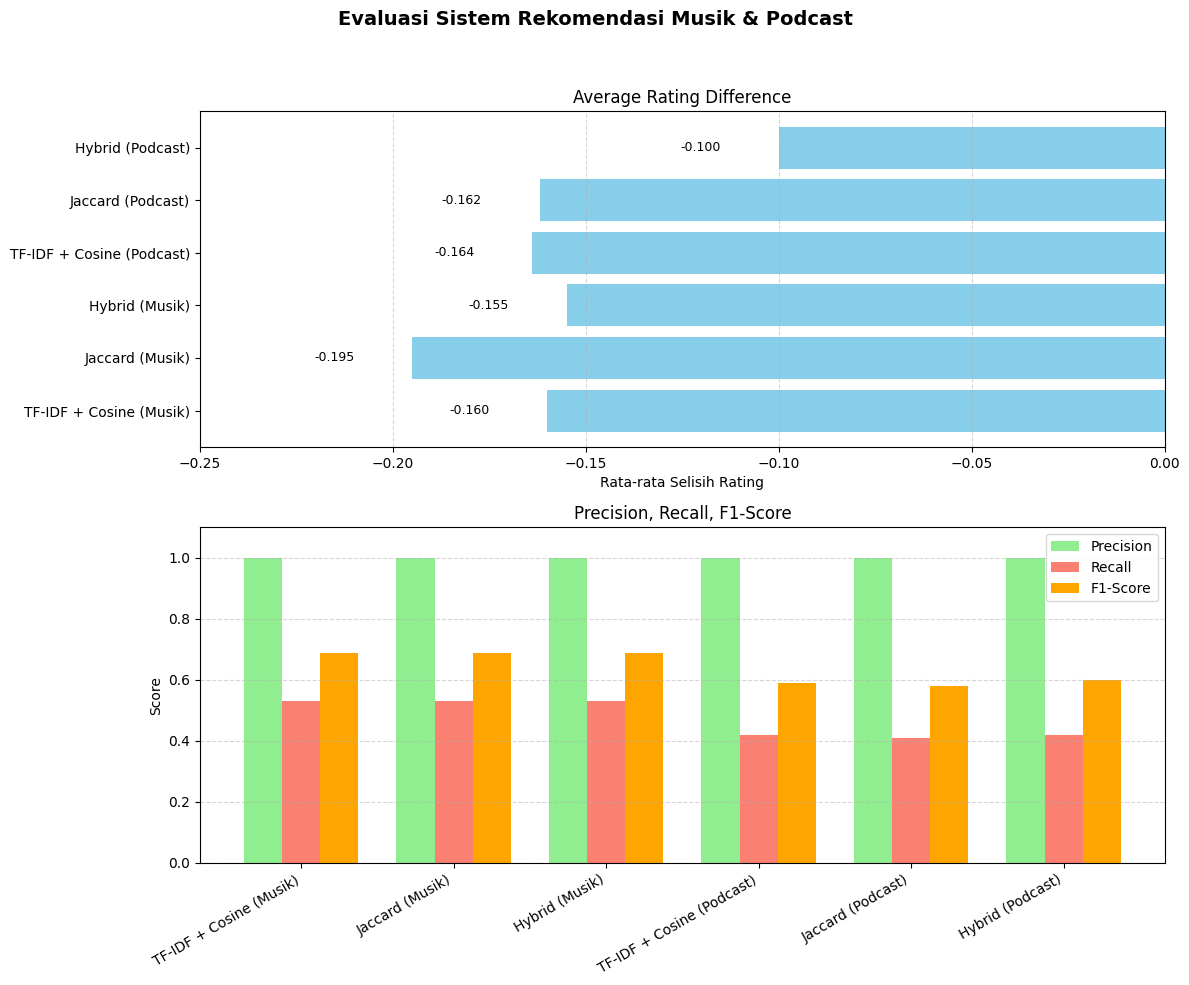

In [83]:
import matplotlib.pyplot as plt

# Data
methods = [
    'TF-IDF + Cosine (Musik)',
    'Jaccard (Musik)',
    'Hybrid (Musik)',
    'TF-IDF + Cosine (Podcast)',
    'Jaccard (Podcast)',
    'Hybrid (Podcast)'
]

avg_rating_diff = [-0.160, -0.195, -0.155, -0.164, -0.162, -0.100]
precision = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
recall = [0.53, 0.53, 0.53, 0.42, 0.41, 0.42]
f1_score = [0.69, 0.69, 0.69, 0.59, 0.58, 0.60]

# Create vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Evaluasi Sistem Rekomendasi Musik & Podcast', fontsize=14, fontweight='bold')

# Subplot 1: Average Rating Difference
bars1 = axes[0].barh(methods, avg_rating_diff, color='skyblue')
axes[0].set_xlim(-0.25, 0)
axes[0].set_title('Average Rating Difference')
axes[0].set_xlabel('Rata-rata Selisih Rating')
axes[0].grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars1:
    width = bar.get_width()
    axes[0].text(width - 0.015, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
                 va='center', ha='right', color='black', fontsize=9)

# Subplot 2: Precision, Recall, F1-Score
x = range(len(methods))
bar_width = 0.25

axes[1].bar([p - bar_width for p in x], precision, width=bar_width, label='Precision', color='lightgreen')
axes[1].bar(x, recall, width=bar_width, label='Recall', color='salmon')
axes[1].bar([p + bar_width for p in x], f1_score, width=bar_width, label='F1-Score', color='orange')
axes[1].set_ylim(0, 1.1)
axes[1].set_title('Precision, Recall, F1-Score')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=30, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Reference

Deldjoo, Y., Schedl, M., & Knees, P. (2021). Content-driven Music Recommendation: Evolution, State of the Art, and Challenges [Preprint].

Chen, K., Liang, B., Ma, X., & Gu, M. (2020). Learning Audio Embeddings with User Listening Data for Content-based Music Recommendation [Preprint].
